In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data2 = np.loadtxt("data_asmt5_2.txt")
n = len(data2)
a0 ,a1= 1,1

In [7]:
def fn(x):
    return a0*(1-np.exp(-a1*x))

def fn_pa0(x):
    return 1-np.exp(-a1*x)

def fn_pa1(x):
    return a0*x*np.exp(-a1*x)

In [8]:
##===----------inverse matrix creation==========
def inverse(m):
    A = np.copy(m)
    n = len(A)

    ####-============--UPPER TRIANGULAR-&-LOWER TRIANGULAR=============-####
    L = np.identity(n)  ##-----------identity matrix------------###
    
    for k in range(n-1): #row iteration
        for i in range(k+1,n): #column iteration
            factor = (A[i][k])/(A[k][k])
            
            L[i][k] = factor   
            for j in range(n):  #all column iteration
                A[i][j] = A[i][j] - factor*A[k][j]  #i = row, j = column
    U = A
    #return L,U
    ###=====================================================###


    
    inv = np.zeros((n,n),dtype = float)  ##---==EMPTY INVERSE MATRIX----

    ##---Creation of a matrix that contains columns of identity matrix as elements
    v = []
    matrix = np.identity(n)
    for i in range(n):
        B = np.reshape(matrix[:,i],(n,1))
        v.append(B)
    BB =  v   
    #======-------------------===================-----------------==========
    
    for k in range(n):     
        B = BB[k]      ##-<<==----====== SELECT A NEW COLUMN FOR EACH K ====---###
        
        ##----===========CREATION OF D MATRIX FOR EACH COLUMN==============----##
        D = np.zeros((n,1),dtype = float)
        count = 0
        for i in range(n):
            dog = B[i]
            if count >0:
                cat = 0
                for j in range(i):
                    cat = cat + L[i][j]*D[j]
                    #print(cat)
                dog = B[i] - cat
            D[i] = dog
            count = count + 1
        ##----========----====================================------=====----##

        
        ##----======CREATION OF COLUMN OF INVERSE MATRIX--USING---UX=D---====###
        #===========-----------backward_substitution(U,D)
        a,b = np.copy(U), np.copy(D)
        n=len(a)
        x = np.zeros((n,1), dtype = float)
        x[n-1] = (b[n-1])/(a[n-1][n-1])
        for i in range(n-2,-1,-1):
            sum = b[i]
            for j in range(i+1,n):
                sum = sum - a[i][j]*x[j]
            x[i] = sum/a[i][i]
        third =  x
        ##----========----=====================================------=====----##

        
        inv[:,k] = third.T   #[:,2] == : means all rows, column 2 => all rows of coumn 2
    return inv            # since it select all rows of a particular column, the input must be a row matrix to replace the 
                                 #elements of that column ==> so taking transpose


In [9]:
print(f"{'Iteration':<18} {'a_0':<20} {'a_1':<20} {'sr'}")  # header line
print("-" * 75)
count = 0
a0 = 1.0
a1 = 1.0

while count <=10:
    z0_mat = np.zeros((n,2),dtype = float)
    for i in range(n):
        z0_mat[i][0] = fn_pa0(data2[i][0])
        z0_mat[i][1] = fn_pa1(data2[i][0])
    Z = np.matmul(z0_mat.T,z0_mat)
    Z_inv = inverse(Z)
    
    D = np.zeros((n,1),dtype = float)
    for j in range(n):
        D[j] = data2[j][1] - fn(data2[j][0])
        
    sr = 0
    for i in range(n):
        e = data2[i][1] - a0*(1 - np.exp(-a1*data2[i][0]))
        sr += e**2
        
    #print("{}  {}  {}  {}".format(count,a0,a1,sr))
    rowf = "{0:2d}       {1:1.16f}    {2:1.18f}    {3:1.18f}"
    print(rowf.format(count,a0,a1,sr))
    
    delt_a = np.matmul(Z_inv,np.matmul(z0_mat.T,D))
    
    a0 = (a0 + delt_a[0])[0]
    a1 = (a1 + delt_a[1])[0]
    
    count +=1

Iteration          a_0                  a_1                  sr
---------------------------------------------------------------------------
 0       1.0000000000000000    1.000000000000000000    7.092742877032788940
 1       0.6374374503829343    1.497991212975911868    1.909403228551378451
 2       0.6938565964168493    1.823451192454752290    0.257928613217865532
 3       0.6977090531184966    1.818202698635136283    0.255243794991514727
 4       0.6977118126492750    1.818207893009905485    0.255243792859197960
 5       0.6977118106202786    1.818207922654634823    0.255243792859197294
 6       0.6977118106086949    1.818207922823902312    0.255243792859197183
 7       0.6977118106086289    1.818207922824868872    0.255243792859196961
 8       0.6977118106086284    1.818207922824874201    0.255243792859197016
 9       0.6977118106086284    1.818207922824874423    0.255243792859196961
10       0.6977118106086284    1.818207922824874423    0.255243792859196961


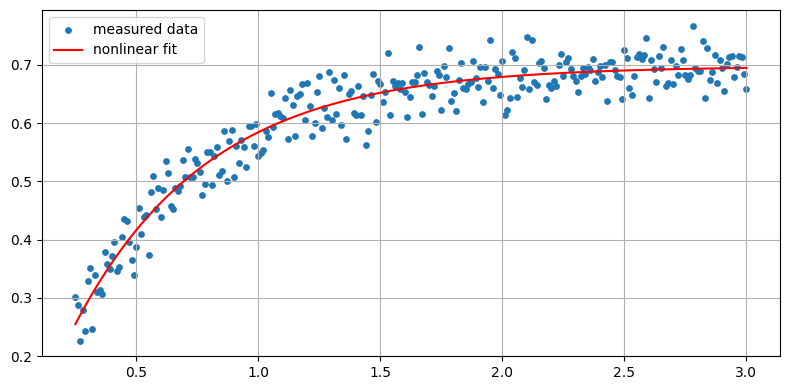

In [13]:
##calculated data
c_data = []
for i in range(n):
    c_data.append(fn(data2[i][0]))

plt.figure(figsize=(8, 4), dpi=100) 
plt.scatter(data2[:,0],data2[:,1], s = 15, label='measured data')
plt.plot(data2[:,0], c_data, color='red', label='nonlinear fit')
plt.tight_layout()
plt.legend()
plt.grid()

In [ ]:
err_a0 = abs(a0p-a0)/abs(a0p) *100
err_a1 = abs(a1p-a1)/abs(a1p) *100

In [ ]:
err_a0,err_a1